In [1]:
!nvidia-smi

Sun Feb 11 12:05:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.1/8062.4 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="MzAxGvbjNtc4rR4dbKQF")
project = rf.workspace("bumps-and-holes").project("speedbreaker-zuyqt")
dataset = project.version(4).download("yolov8")


/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.11 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.8.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
loading Roboflow workspace...
loading 


Extracting Dataset Version Zip to speedbreaker-4 in yolov8:: 100%|██████████| 21392/21392 [00:03<00:00, 6706.86it/s] 


## Custom Training

In [11]:
%cd {HOME}

!yolo task=detect mode=train resume model=/kaggle/working/runs/detect/train/weights/last.pt data=/kaggle/input/potholesyaml2/datapotholes.yaml epochs=200 imgsz=640 plots=True

/kaggle/working
Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/last.pt, data=/kaggle/input/potholesyaml2/datapotholes.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

In [12]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch0.jpg
PR_curve.png					   train_batch1.jpg
P_curve.png					   train_batch101840.jpg
R_curve.png					   train_batch101841.jpg
args.yaml					   train_batch101842.jpg
confusion_matrix.png				   train_batch2.jpg
confusion_matrix_normalized.png			   val_batch0_labels.jpg
events.out.tfevents.1707637283.f91e44e85e84.104.0  val_batch0_pred.jpg
events.out.tfevents.1707653319.945950e38d7a.162.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights


/kaggle/working


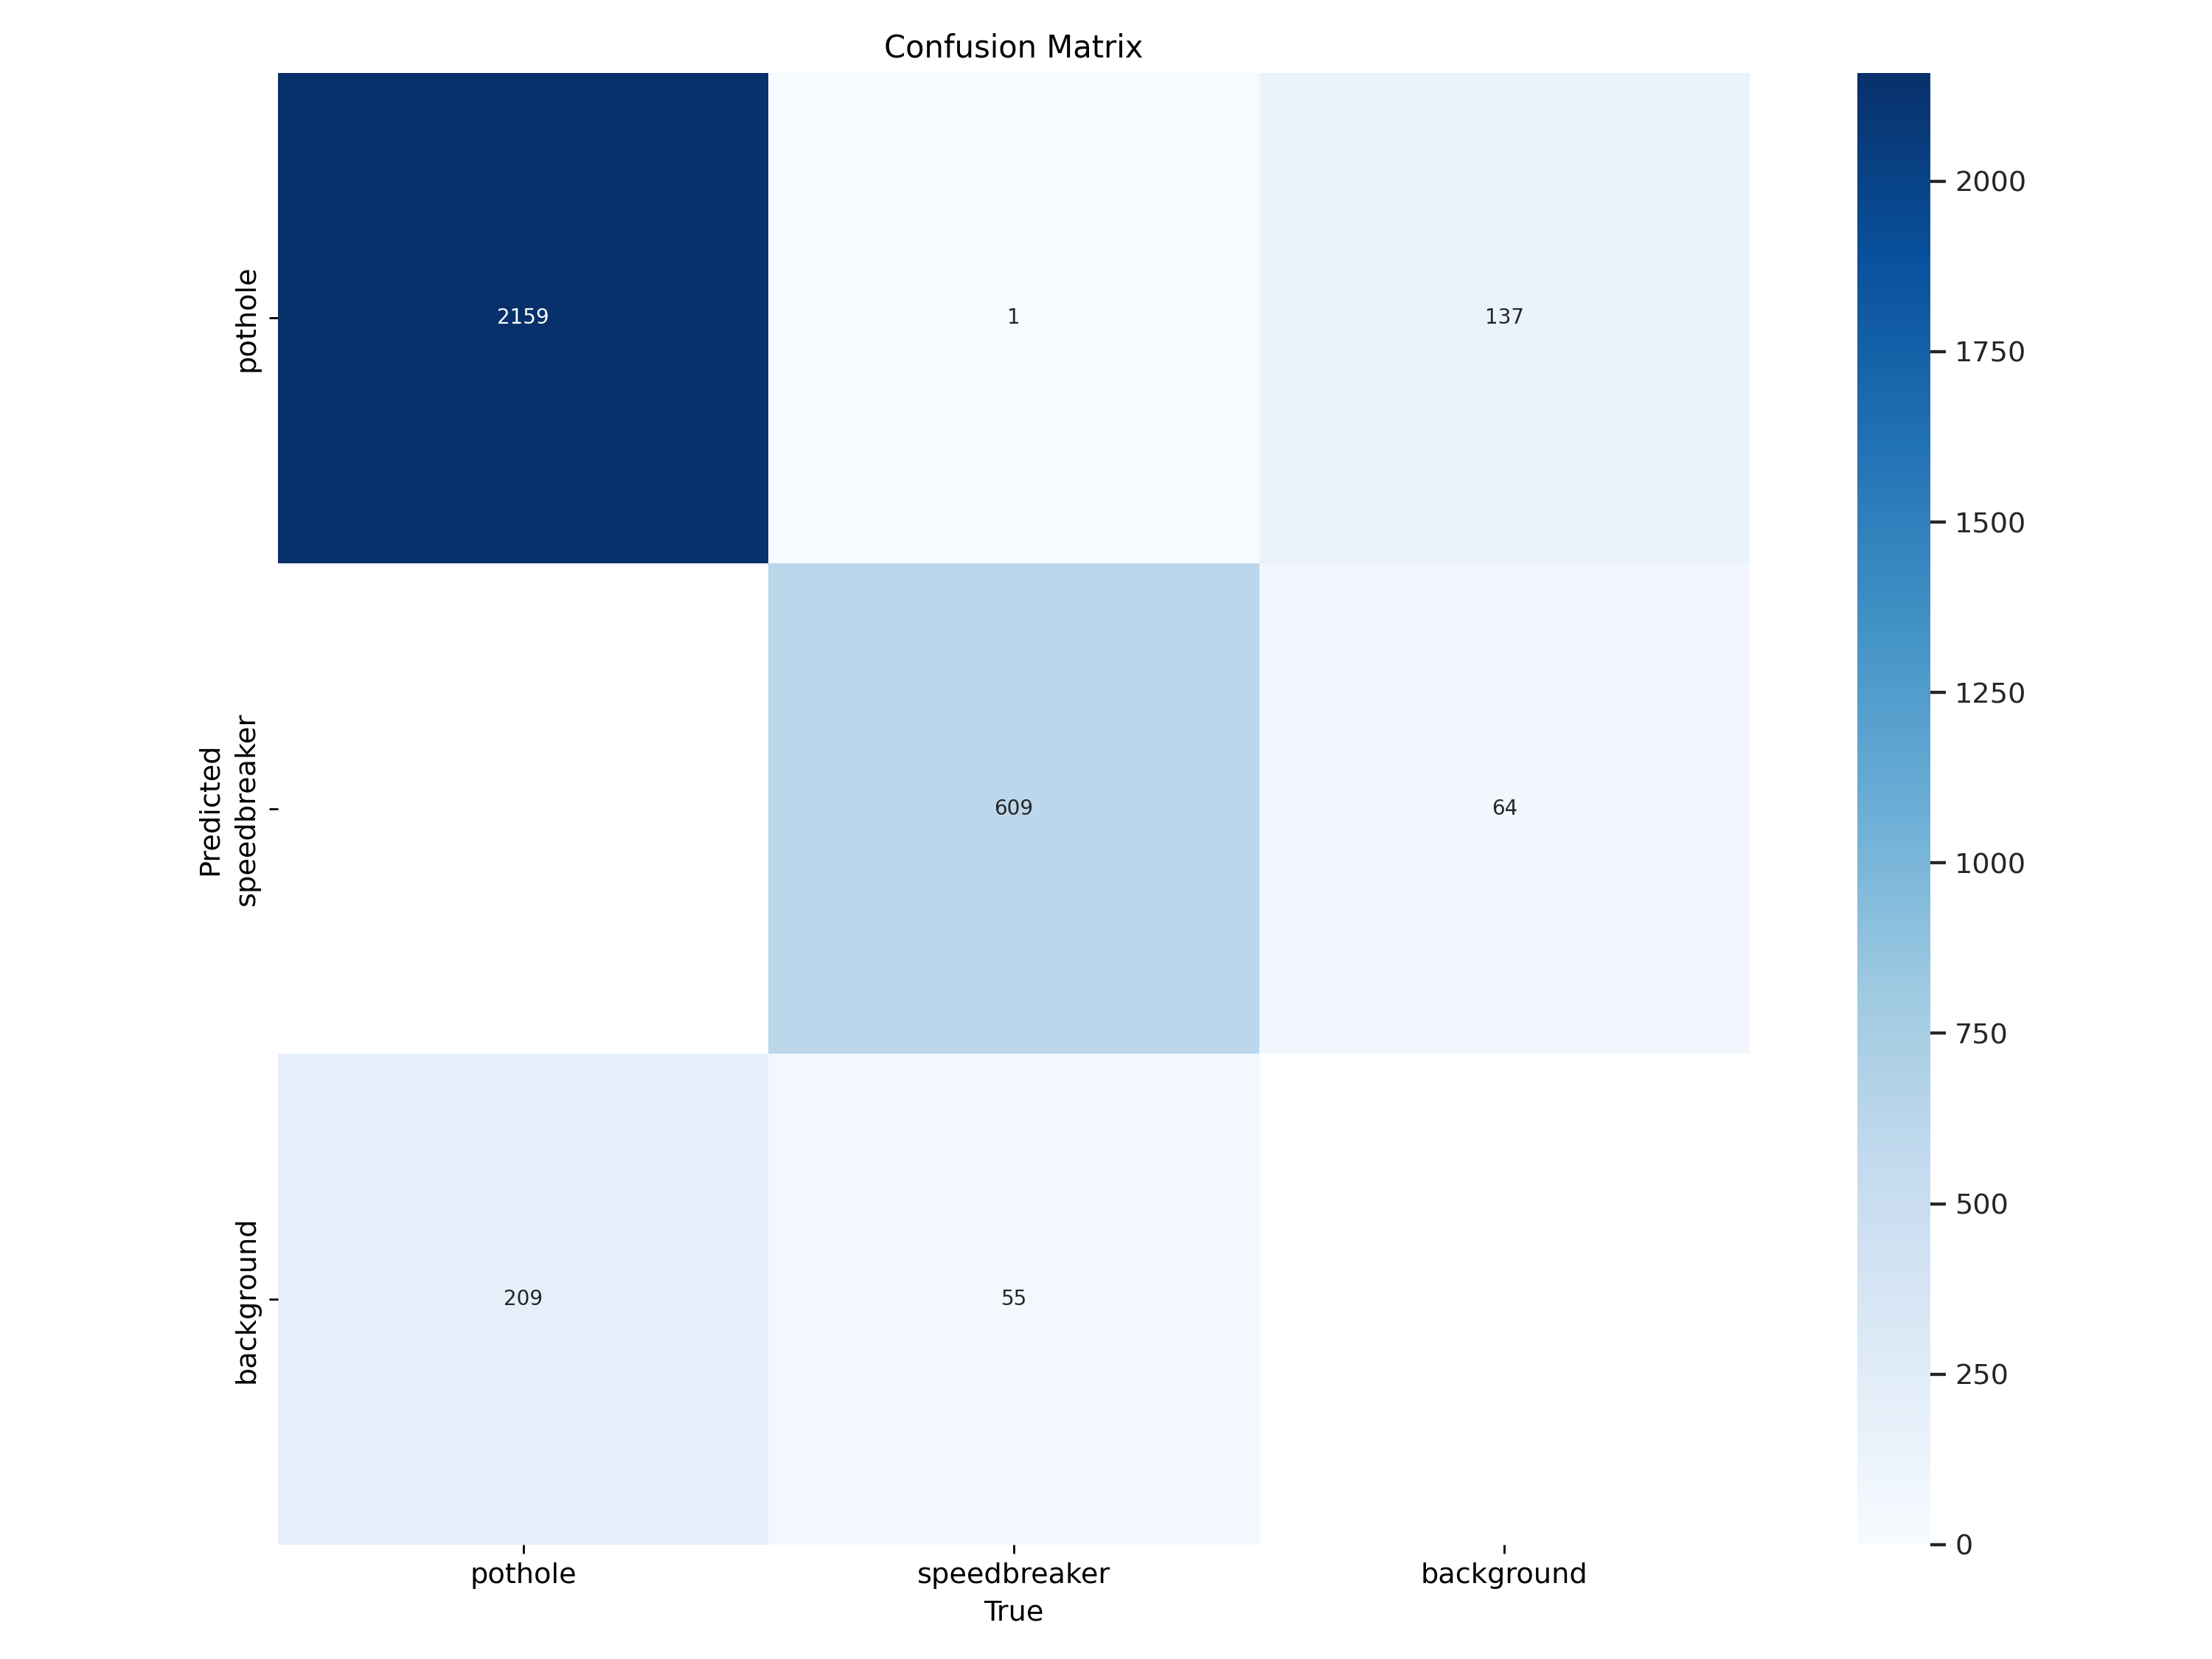

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


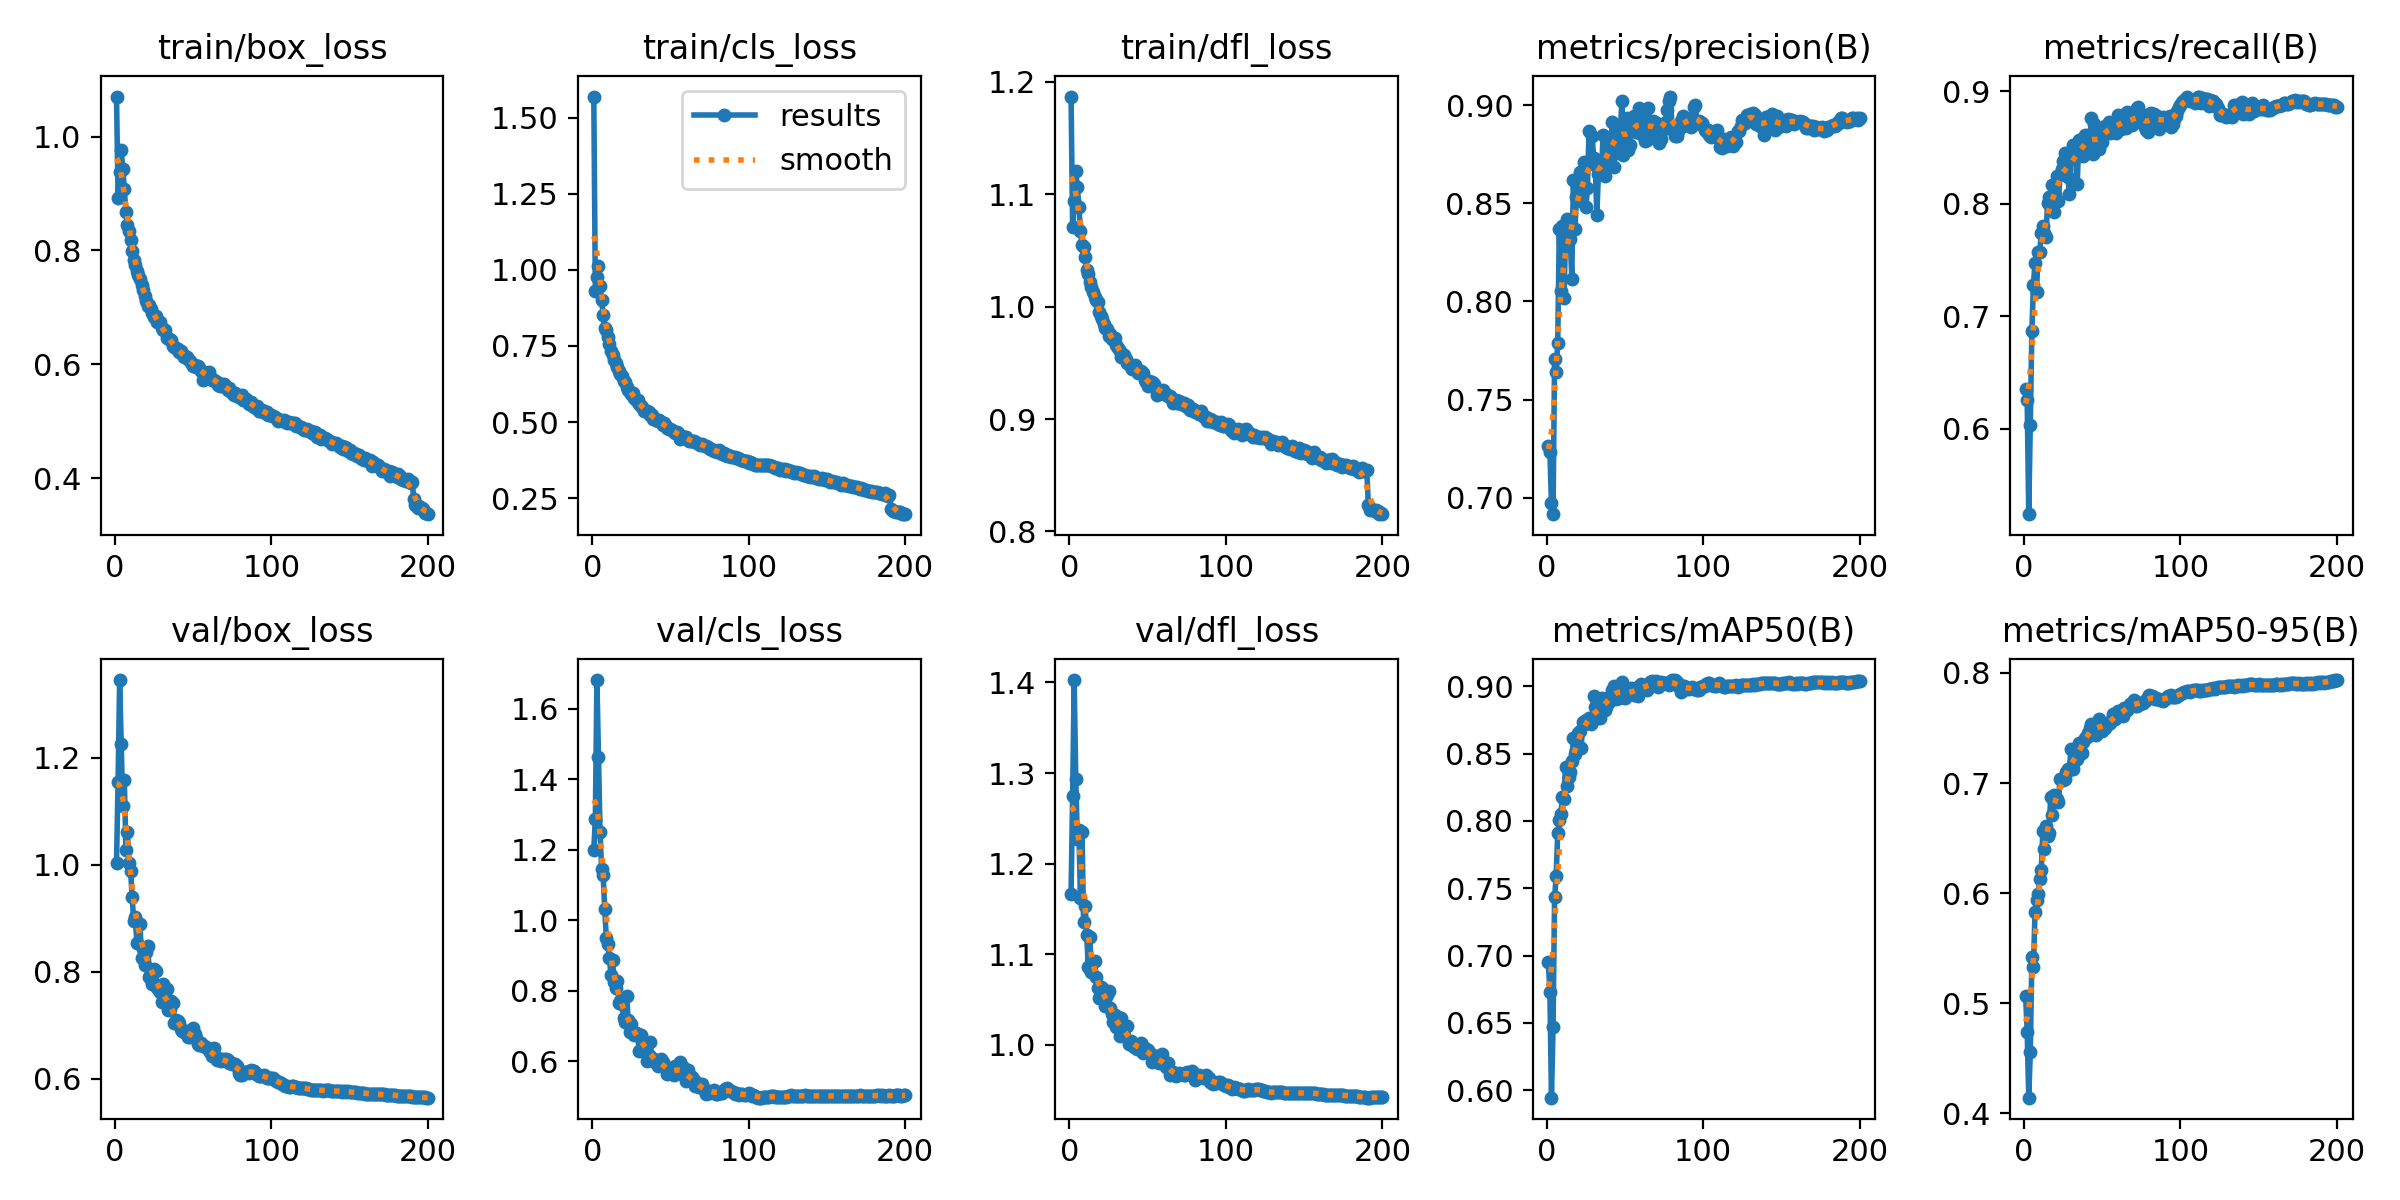

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


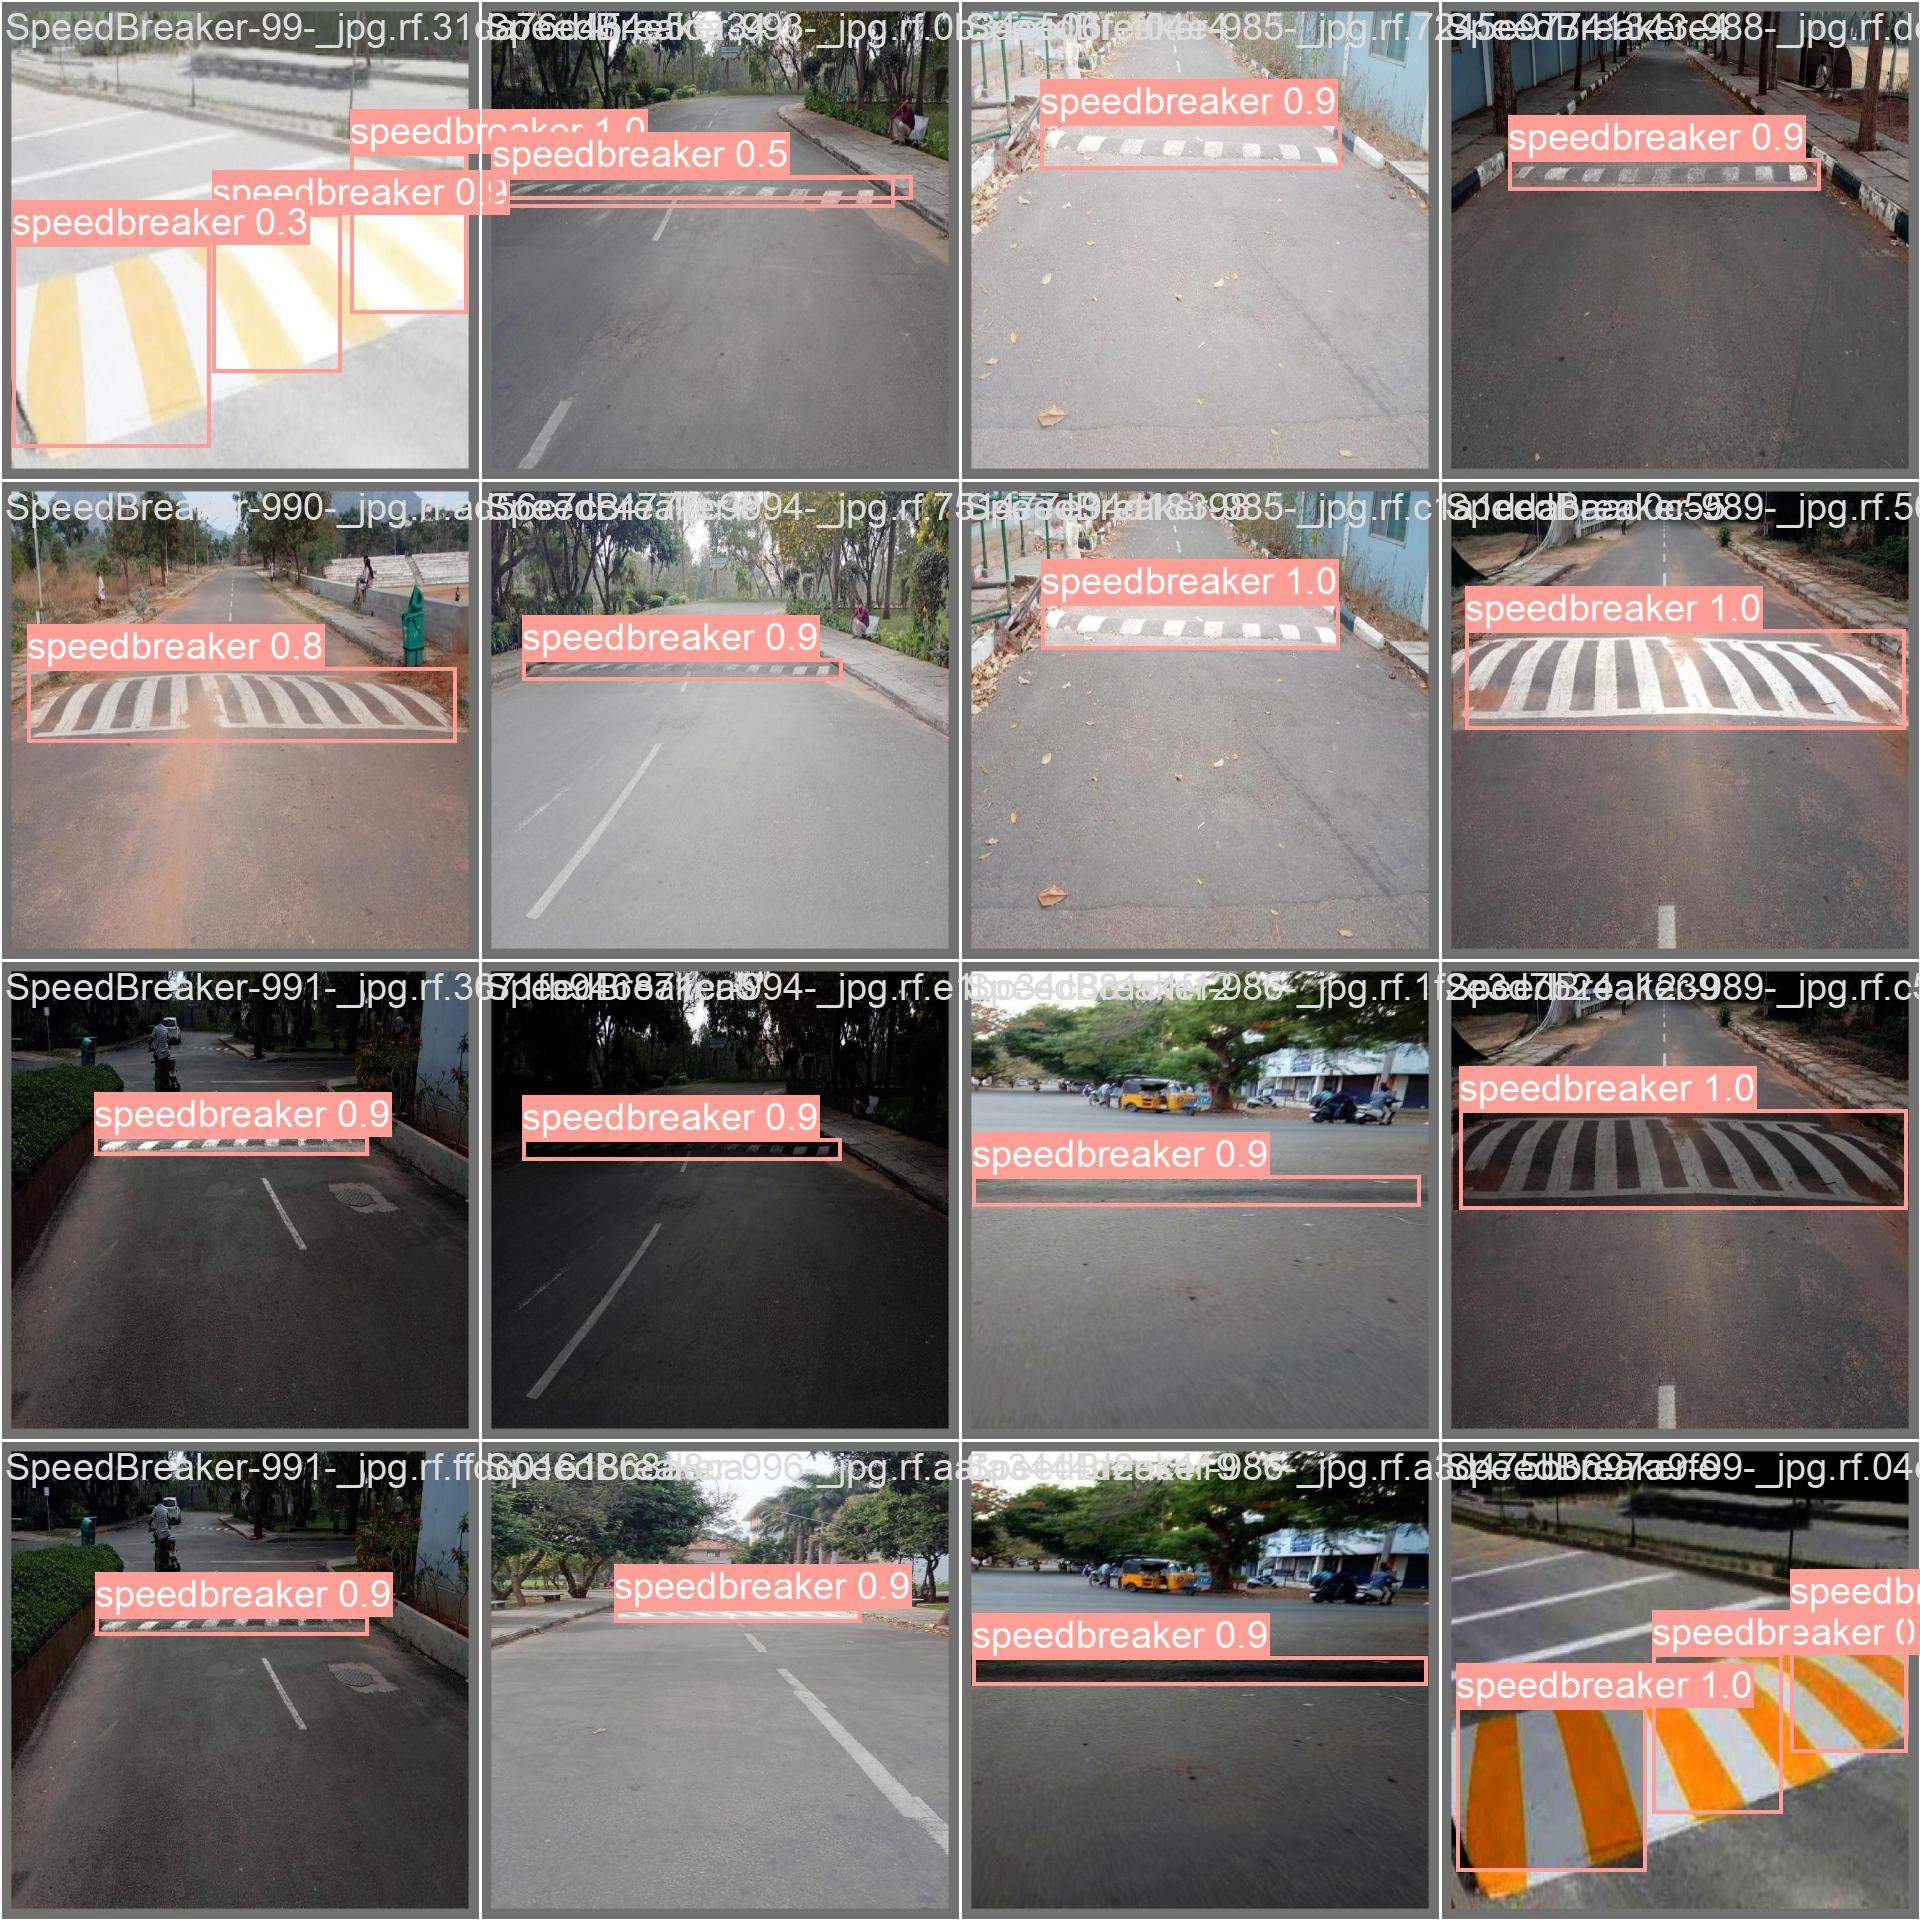

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/input/potholesyaml2/datapotholes.yaml

/kaggle/working
Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/speedbreaker-4/valid/labels.cache... 1378
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1378       3033      0.894      0.887      0.904      0.794
               pothole       1378       2368      0.951      0.897      0.942      0.826
          speedbreaker       1378        665      0.838      0.877      0.866      0.762
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [21]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.65 source=/kaggle/working/datasets/speedbreaker-4/test/images save=True

Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-10-_jpg.rf.c9845a356a33d02ed3c4cf3a716f1b17.jpg: 640x640 5 potholes, 8.0ms
image 2/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-1008-_jpg.rf.d9f17a332f34ea8b43e3b36f1190063a.jpg: 640x640 1 pothole, 8.0ms
image 3/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-101-_jpg.rf.f59f2161b97973a7f0e1f4279b23799d.jpg: 640x640 10 potholes, 7.9ms
image 4/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-1015-_jpg.rf.23883211ad113171d85cc73f4b7b919c.jpg: 640x640 4 potholes, 7.9ms
image 5/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-1018-_jpg.rf.640820b0a678398e243046ffffd990fe.jpg: 640x640 2 potholes, 7.9ms
image 6/738 /kaggle/working/datasets/speedbreaker-4/test/images/Pothole-1019-_jpg.r

**NOTE:** Let's take a look at few results.

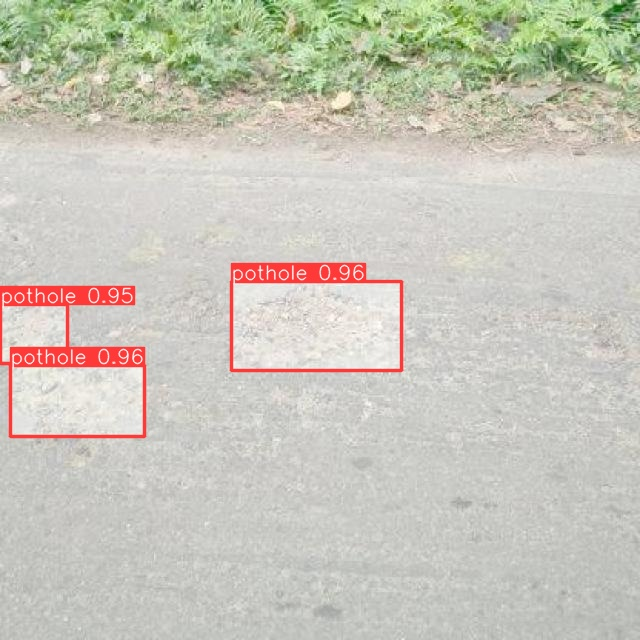

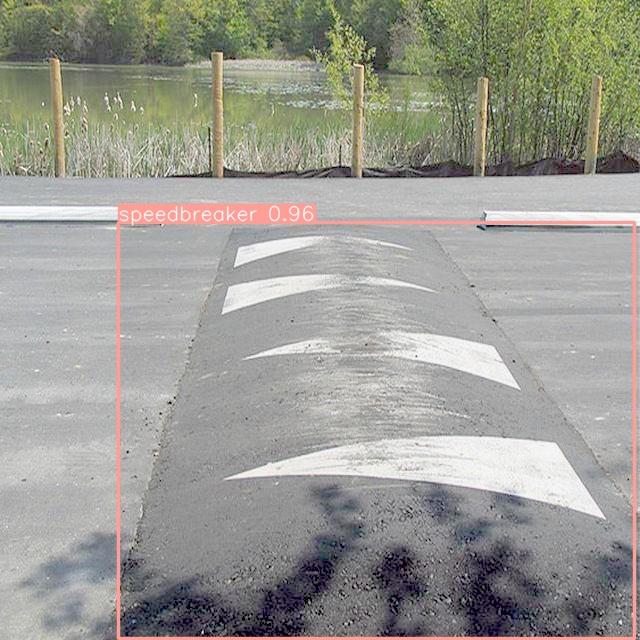

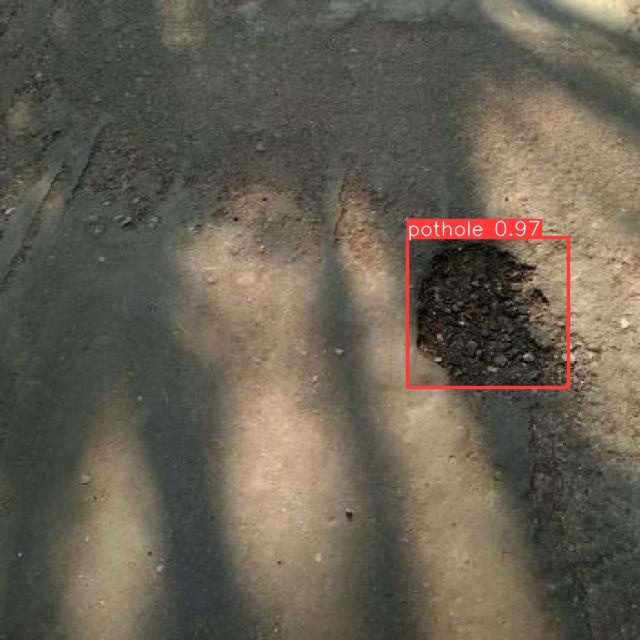

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
import shutil
shutil.make_archive('full_zip', 'zip', '/kaggle/working/runs/detect/train')

'/kaggle/working/full_zip.zip'